## Logistic Regression
## Bank Dataset
## A Way to solve the problem by Shoichi.
***

## Import Library & Default Settings

In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Preprocessing

#### Load the ‘Bank_data.csv’ dataset.

In [2]:
raw_data = pd.read_csv("Bank_data.csv", index_col=0)
display(raw_data.head())

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [3]:

display('Columns Data Types',raw_data.dtypes)
display('# of missing value in each columns',raw_data.isnull().sum(axis=0))
display(raw_data.describe())
display(raw_data.describe(include=['object','bool']))


'Columns Data Types'

interest_rate    float64
credit           float64
march            float64
may              float64
previous         float64
duration         float64
y                 object
dtype: object

'# of missing value in each columns'

interest_rate    0
credit           0
march            0
may              0
previous         0
duration         0
y                0
dtype: int64

,interest_rate,credit,march,may,previous,duration
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000


,y
count,518
unique,2
top,no
freq,259


In [4]:
raw_data['y'] = raw_data['y'].map({'no':0,'yes':1})

In [5]:
data = raw_data.copy(deep=True)
data.head(5)

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


### Univariate Analysis
#### According to description appearently,
#### Features: credit, march, may, previous || boolean [0-1]
#### Featyres : interest_rate, duration || Numerical data
Note that <i> interest rate</i> indicates the 3-month interest rate between banks and <i> duration </i> indicates the time since the last contact was made with a given consumer. The <i> previous </i> variable shows whether the last marketing campaign was successful with this customer. The <i>march</i> and <i> may </i> are Boolean variables that account for when the call was made to the specific customer and <i> credit </i> shows if the customer has enough credit to avoid defaulting.


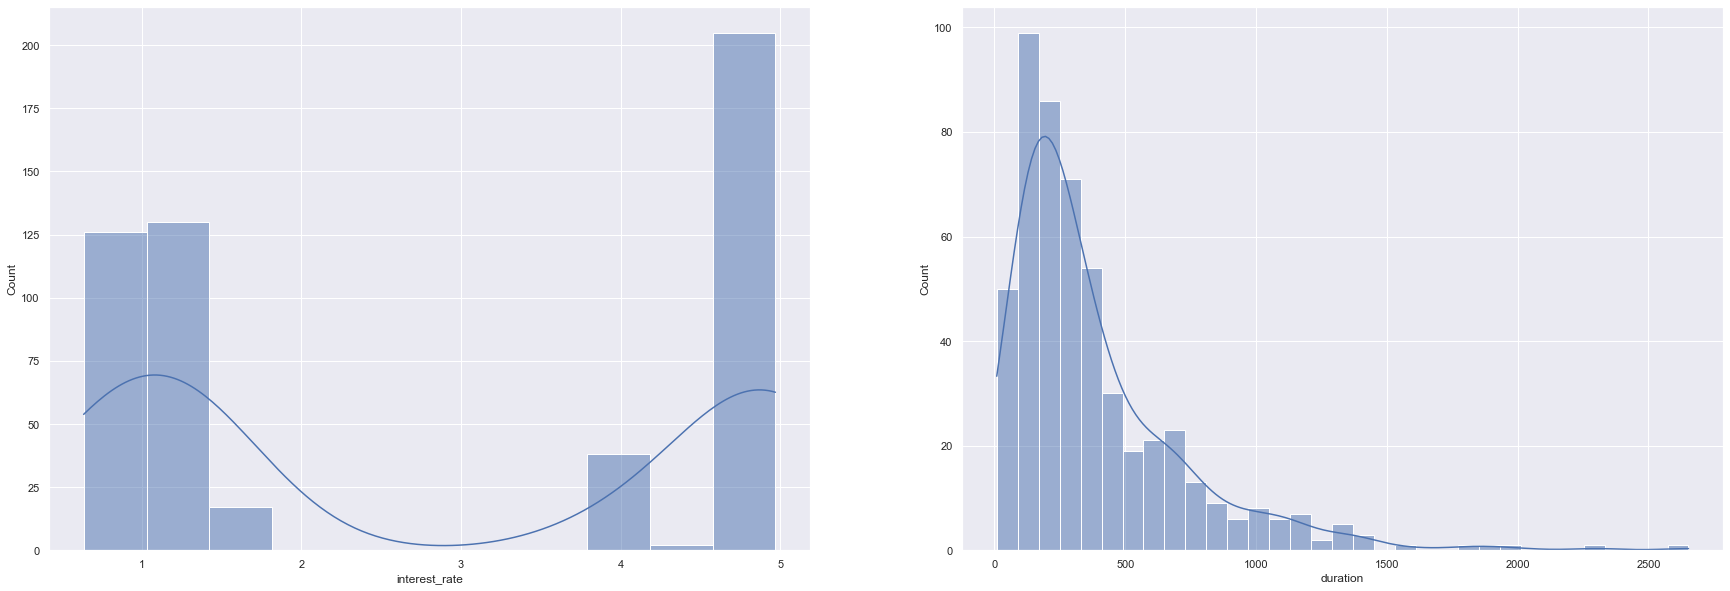

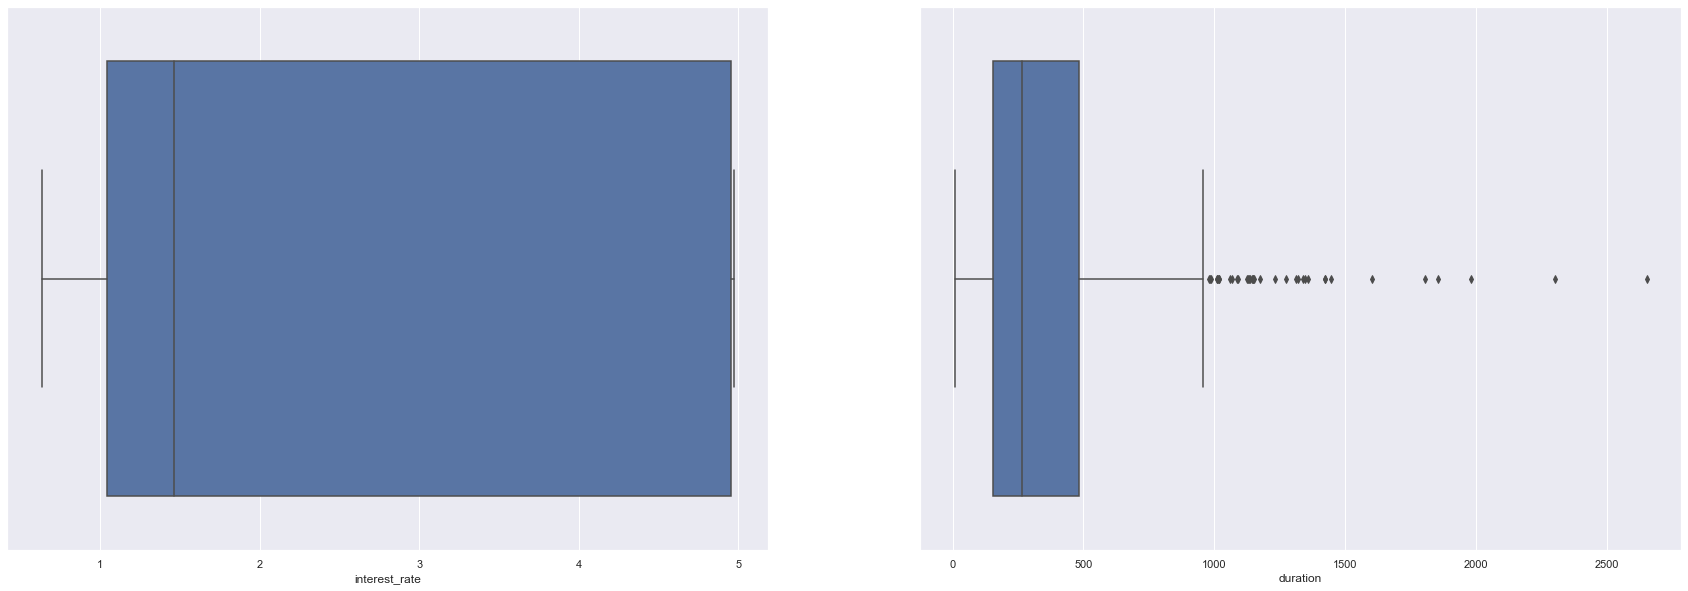

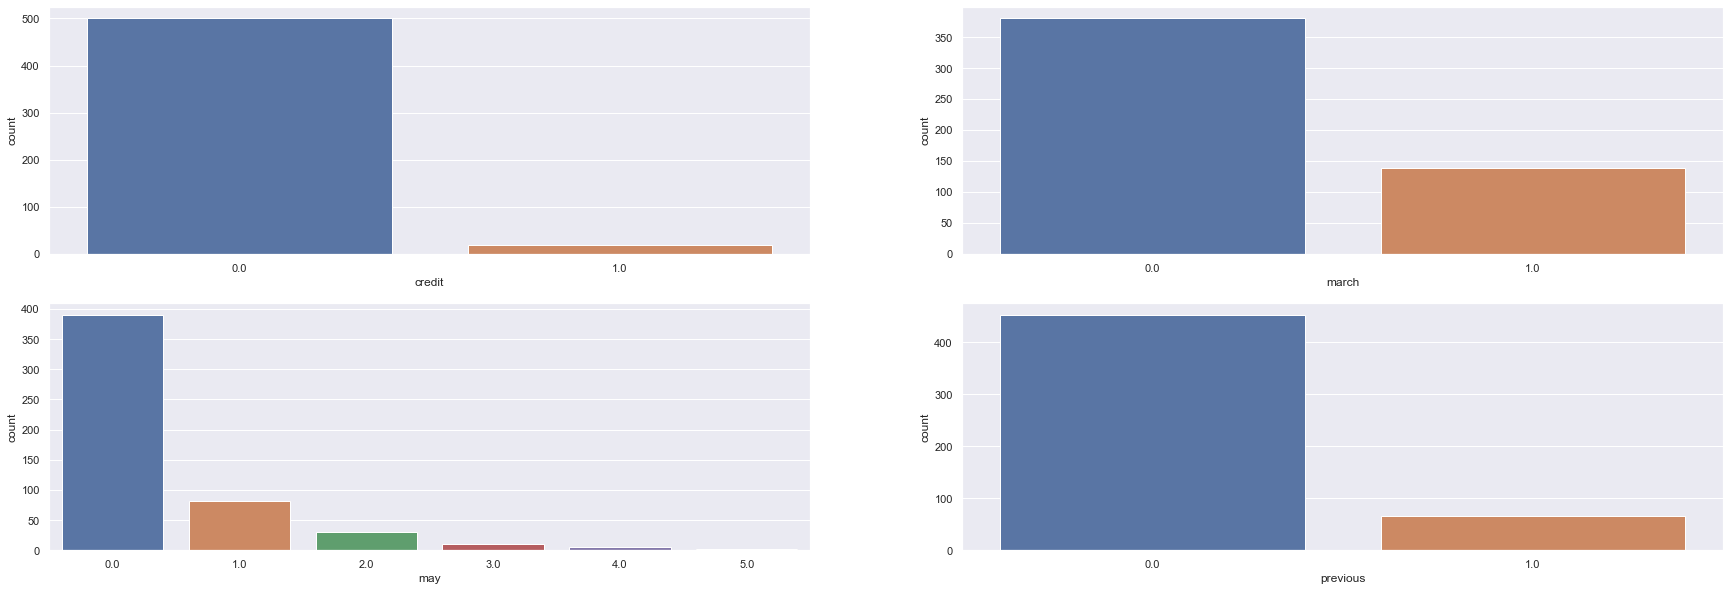

In [6]:
fig1, ax1 = plt.subplots(1, 2, figsize=(30,10))
for feature, subplot in zip(list(['interest_rate','duration']), ax1.flatten()):
        sns.histplot(x=data[feature], kde=True, ax=subplot)
fig2, ax2 = plt.subplots(1, 2, figsize=(30,10))
for feature, subplot in zip(list(['interest_rate','duration']), ax2.flatten()):
        sns.boxplot(x=data[feature], ax=subplot)
fig3, ax3 = plt.subplots(2, 2, figsize=(30,10))
for feature, subplot in zip(list(['credit','march','may','previous']), ax3.flatten()):
        sns.countplot(x=data[feature], ax=subplot)

In [7]:
# CLEAN OUTLIERS OF DURATION
# THE TOP 99% of duration is 
display(f"THE TOP 99% of duration is {data['duration'].quantile(0.99)}")
data = data[data['duration'] < data['duration'].quantile(0.99)]

'THE TOP 99% of duration is 1575.6499999999976'

In [8]:
# CHANGE 2-5 OF MAY TO 1
data.loc[data.may > 1.0, 'may'] = 1

[Text(0.5, 1.0, 'Boolean May columns')]

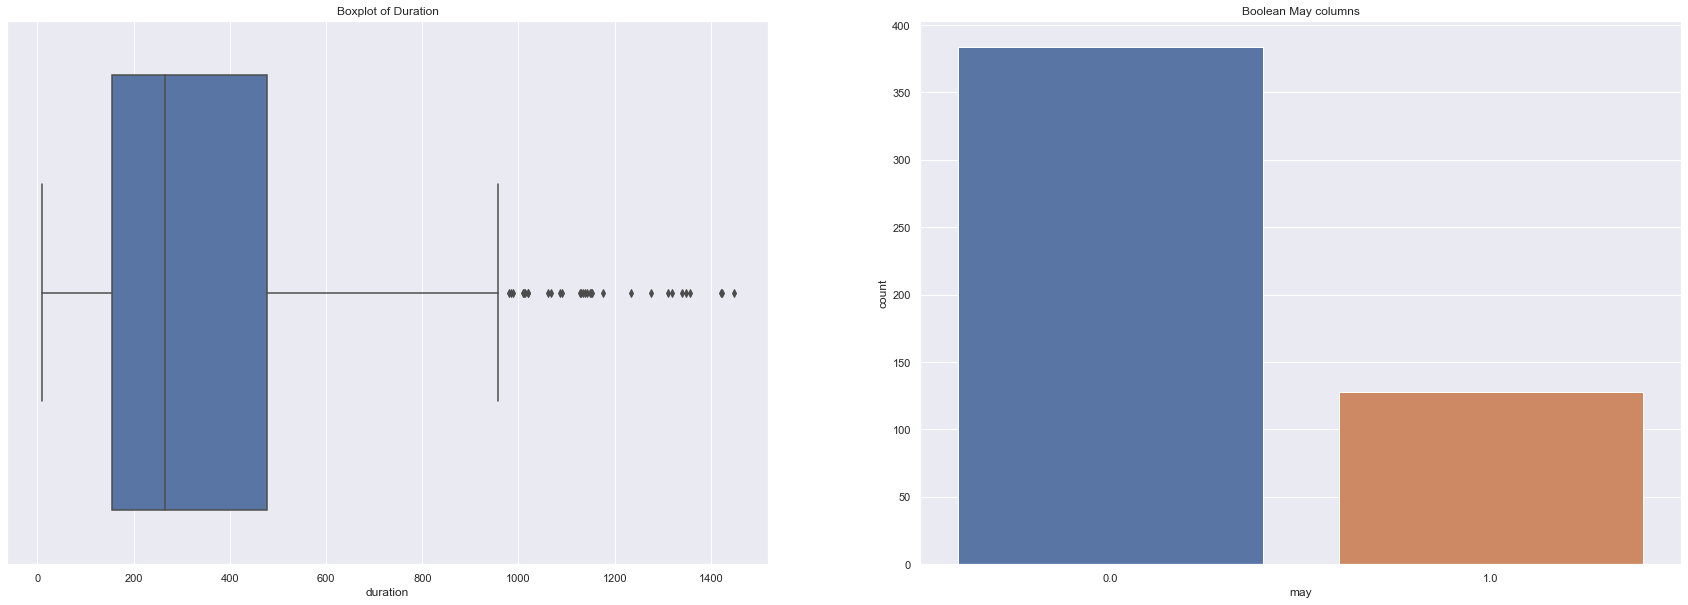

In [10]:
# NEW PLOT
fig4, ax4 = plt.subplots(1, 2, figsize=(30,10))
sns.boxplot(x=data['duration'], ax=ax4[0]).set(title='Boxplot of Duration')
sns.countplot(x=data['may'],ax=ax4[1]).set(title='Boolean May columns')

### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [15]:
target = data['y']
input_features = data[['interest_rate','credit', 'march', 'may', 'previous', 'duration']]

In [19]:
model = LogisticRegression(max_iter=5000)
model.fit(input_features, target)

LogisticRegression(max_iter=5000)

In [23]:
predicted = model.predict(input_features)

In [25]:
display('Confusion Matrix', confusion_matrix(target, predicted))
print(f"Train Accuracy: {model.score(input_features,target):.5f}")

'Confusion Matrix'

array([[219,  40],
       [ 26, 227]], dtype=int64)

Train Accuracy: 0.87109


### TEST DATA

In [33]:
test_data = pd.read_csv('Bank_data_testing.csv', index_col=0)
test_data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4.963,0.0,0.0,0.0,0.0,36.0,no


In [34]:
test_data['y'] = test_data['y'].map({'no':0,'yes':1})

In [35]:
test_features = test_data[['interest_rate','credit', 'march', 'may', 'previous', 'duration']]
test_target = test_data['y']

In [37]:
test_predicted = model.predict(test_features)

In [38]:
display('Confusion Matrix', confusion_matrix(test_target, test_predicted))
print(f"Train Accuracy: {model.score(test_features,test_target):.5f}")

'Confusion Matrix'

array([[93, 18],
       [13, 98]], dtype=int64)

Train Accuracy: 0.86036
